# Python Test 

In this Python test you will have to download new packages and use SQL, if you have any issue to answer a question don't hesitate to skeep it or to use another way to answer the problem, please comment or explain your code when you think it's usfuel. Kindly use function or class and type your variable. 

Good luck ! 

## Step 1

### Question 1
- Retrieve and print the price of European crude oil benchmark from 2010 until today using Yahoo Finance API (or another API)
- Compute the monthly average Closing price and retrive it in a yearly sesasonal data frame : (helper: https://stackoverflow.com/questions/47259570/a-pythonic-way-to-generate-a-seasonal-dataframe-from-a-pandas-timeseries-dataf)
- Compute the difference between the daily High and Low price divide by the volume

In [1]:
#CODE
import yfinance as yf
from pandas_datareader import data as pdr
import pandas as pd

# Define the symbol for the European crude oil benchmark
symbol = "BZ=F"

# Retrieve the historical price data
Europ_oil = yf.download(symbol, start="2010-01-01", end="2023-02-15")

# Print the price data
Europ_oil.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,80.120003,79.820000,80.120003,80.120003,80.120003,97
2010-01-05,80.589996,80.260002,80.589996,80.589996,80.589996,97
2010-01-06,81.129997,81.699997,80.129997,81.889999,81.889999,7
2010-01-07,81.510002,81.510002,81.629997,81.510002,81.510002,7
2010-01-08,81.370003,81.529999,81.089996,81.370003,81.370003,7


In [2]:
import matplotlib.pyplot as plt

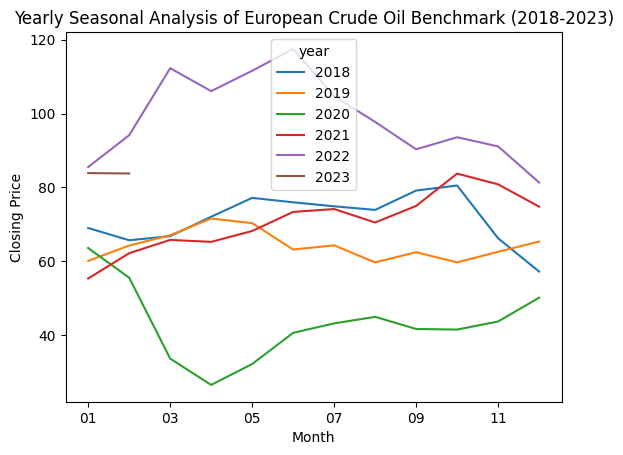

In [3]:
monthly_data = Europ_oil["Close"].resample("M").mean()

# Compute the yearly seasonal dataframe
yearly_data = pd.DataFrame(monthly_data)
yearly_data["month"] = yearly_data.index.strftime('%m')
yearly_data["year"] = yearly_data.index.year
yearly_data = yearly_data[yearly_data["year"] >= 2018]
yearly_data = yearly_data.pivot(index="month", columns="year", values="Close")

fig, ax = plt.subplots()
yearly_data.plot(ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Closing Price")
ax.set_title("Yearly Seasonal Analysis of European Crude Oil Benchmark (2018-2023)")
plt.show()


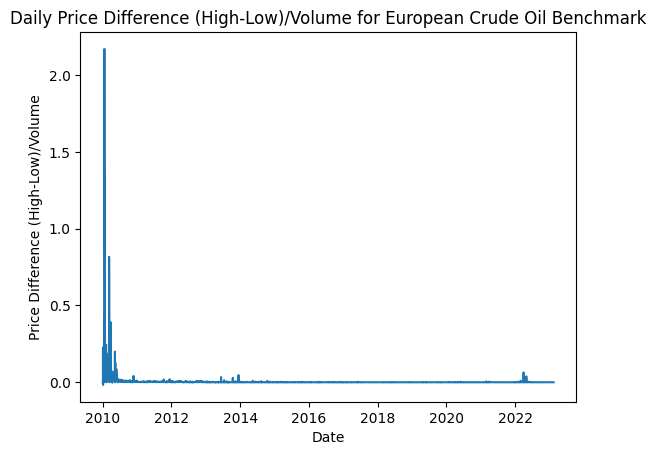

In [4]:
# Calculate the difference between the daily High and Low price divided by the volume for all available days
price_diff = (Europ_oil['High'] - Europ_oil['Low']) / Europ_oil['Volume']

# Create a line plot of the price difference over time
fig, ax = plt.subplots()
ax.plot(price_diff.index, price_diff)
ax.set_xlabel("Date")
ax.set_ylabel("Price Difference (High-Low)/Volume")
ax.set_title("Daily Price Difference (High-Low)/Volume for European Crude Oil Benchmark")

plt.show()


### Question 2
Check using python if the Close price time serie has a unit root 


In [5]:
#CODE 
from statsmodels.tsa.stattools import adfuller

# Run the ADF test on the Close price time series
result = adfuller(Europ_oil["Close"])

# Print the test statistics and p-value
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print("\t", key, ": ", value)

ADF Statistic: -1.633847263321833
p-value: 0.465477551032793
Critical Values:
	 1% :  -3.432357502010421
	 5% :  -2.862426994644342
	 10% :  -2.567242166152283


•The ADF test is a statistical test used to determine if a time series is stationary or non-stationary. If the p-value is greater than the significance level (typically 0.05), then the null hypothesis of a unit root (i.e., non-stationary time series) cannot be rejected. In this case, since the p-value is 0.465, which is greater than 0.05, we cannot reject the null hypothesis and conclude that the Close price time series for European crude oil benchmark from 2010 until today may have a unit root, indicating that the series may be non-stationary. $\\$
•We could run the same test from later than 2010 to see if the time series become stationary in the future.

### Question 3
- Compute the return and log return of Brent Close price,
- Compute the 95% quantile of the return 
- Print the mean, median and std,
- Plot using plotly packages the PDF, mean, median and 2 standard deviations (helper https://plotly.com/python/histograms/)
- (Bonus) Compute the CDF and the pval of the last value (today)

In [6]:
#CODE
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import plotly.express as px

In [7]:
# Compute the daily returns of the Brent Close price
returns = Europ_oil['Close'].pct_change()
returns = returns.dropna()

# Compute the daily log returns of the Brent Close price
log_returns = np.log(Europ_oil['Close']).diff()
log_returns = log_returns.dropna()

# Create a figure with two subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True)

# Add the returns subplot
fig.add_trace(go.Scatter(x=Europ_oil.index, y=returns, name='Returns'), row=1, col=1)

# Add the log returns subplot
fig.add_trace(go.Scatter(x=Europ_oil.index, y=log_returns, name='Log Returns'), row=2, col=1)

# Update the layout
fig.update_layout(title='Brent Close Price Returns and Log Returns',
                  xaxis_title='Date',
                  yaxis=dict(title='Return'),
                  yaxis2=dict(title='Log Return'),
                  height=600)

# Show the figure
fig.show()

In [8]:
# Compute the summary statistics of the returns
mean_return = np.mean(returns)
median_return = np.median(returns)
std_return = np.std(returns)
quantile_95 = np.percentile(returns, 95)

# Compute the summary statistics of the log returns
mean_log_return = np.mean(log_returns)
median_log_return = np.median(log_returns)
std_log_return = np.std(log_returns)
quantile_95_log = np.percentile(log_returns, 95)

# Create a dictionary with the summary statistics
summary_dict = {'Mean': [mean_return, mean_log_return], 
                'Median': [median_return, median_log_return], 
                'Standard deviation': [std_return, std_log_return], 
                '95% quantile': [quantile_95, quantile_95_log]}

# Create a pandas DataFrame from the dictionary
summary_df = pd.DataFrame(summary_dict)
summary_df.index = ['Return', 'Log Return']

# Print the summary statistics as a table
summary_df.head()

,Mean,Median,Standard deviation,95% quantile
Return,0.000297,0.00042,0.023499,0.032373
Log Return,0.000020,0.00042,0.023575,0.031860


In [9]:
# Create a histogram of the returns
hist_return = pd.DataFrame({'Returns': returns})
fig = px.histogram(hist_return, x='Returns', nbins=200, opacity=0.5,
                   title='PDF of Returns')
fig.update_traces(marker_color='blue', marker_line_color='black',
                  marker_line_width=1)

# Add the mean and median lines
fig.add_shape(type='line', x0=mean_return, y0=0, x1=mean_return, y1=500,
              line=dict(color='red', width=2), name='Mean')
fig.add_shape(type='line', x0=median_return, y0=0, x1=median_return, y1=500,
              line=dict(color='green', width=2), name='Median')

# Add the standard deviation regions
fig.add_shape(type='rect', x0=mean_return - 2 * std_return, y0=0, x1=mean_return + 2 * std_return,
              y1=10, line=dict(color='purple', width=2), fillcolor='purple', opacity=1, name='2 Std Dev')

fig.update_layout(xaxis_title='Return', yaxis_title='Density',
                  legend=dict(title='Legend', x=0, y=1))

fig.show(legend = True)

In [10]:
import statsmodels.api as sm
from scipy.stats import norm
from IPython.display import Markdown as md

# Compute the CDF of the returns
ecdf = sm.distributions.ECDF(returns)
x = sorted(set(returns))
y = ecdf(x)

# Get the last return value
last_return = returns[-1]

# Compute the mean and standard deviation of the returns
mu = returns.mean()
sigma = returns.std()

# Compute the z-score and p-value of the last return
z_score = (last_return - mu) / sigma
p_value = norm.sf(abs(z_score))


# Create a scatter plot of the CDF and add a marker for the last value
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="lines + markers", name="Empirical CDF"))
fig.add_trace(go.Scatter(x=[min(returns), last_return,last_return], y=[ecdf(last_return), ecdf(last_return),0], mode="lines + markers", name="Last Value"))
fig.update_layout(title="Cumulative Distribution Function of Returns",
                  xaxis_title="Returns", yaxis_title="Cumulative Probability",
                  template='plotly_white')
fig.show()

# print the p-value and interpretion
print(f"p-value: {p_value} \n"  f"Based on the p-value of {p_value.round(4)}, we would typically fail to reject the null hypothesis that the last return value is drawn from a normal distribution.")


p-value: 0.3020083285763753 
Based on the p-value of 0.302, we would typically fail to reject the null hypothesis that the last return value is drawn from a normal distribution.


### Question 4
Check if the return and log return are stationary process and if they follow a normal distribution (using statistical test)

In [11]:
#CODE
from scipy.stats import jarque_bera, normaltest

# Perform the tests on the returns and log returns
for data, name in zip([returns, log_returns], ["returns", "log returns"]):
    adf_stat, adf_pval, _, _, _, _ = adfuller(data)
    jb_stat, jb_pval = jarque_bera(data)
    nt_stat, nt_pval = normaltest(data)
    print(f"ADF test results for Brent :")
    print(f"ADF Statistic: {adf_stat:.4f}")
    print(f"p-value: {adf_pval:.4f}")
    print("\nJarque-Bera test results for Brent :")
    print(f"JB Statistic: {jb_stat:.4f}")
    print(f"p-value: {jb_pval:.4f}")
    print("\nNormality test results for Brent :")
    print(f"JB Statistic: {nt_stat:.4f}")
    print(f"p-value: {nt_pval:.4f}")


ADF test results for Brent :
ADF Statistic: -10.8159
p-value: 0.0000

Jarque-Bera test results for Brent :
JB Statistic: 58603.7565
p-value: 0.0000

Normality test results for Brent :
JB Statistic: 843.8378
p-value: 0.0000
ADF test results for Brent :
ADF Statistic: -10.7401
p-value: 0.0000

Jarque-Bera test results for Brent :
JB Statistic: 60227.6838
p-value: 0.0000

Normality test results for Brent :
JB Statistic: 990.4500
p-value: 0.0000


### [Interpretation: In summary, the tests indicate that the returns and log returns are stationary processes, but they do not follow a normal distribution.]()
Here is how you can interpret the results of the statistical tests:

ADF test: This test checks whether the returns and log returns are stationary (i.e., have a constant mean and variance over time) or not. The ADF statistic measures the "strength" of the evidence against the null hypothesis of non-stationarity. In this case, the ADF statistic is very negative (around -11), indicating that the null hypothesis can be strongly rejected. The p-value is very small (close to 0), which further supports the rejection of the null hypothesis. Therefore, we can conclude that the returns and log returns are stationary.

Jarque-Bera test: This test checks whether the returns and log returns follow a normal distribution or not. The JB statistic measures the "distance" between the sample distribution and a normal distribution. In this case, the JB statistic is very large (around 58603 for returns and 60227 for log returns), indicating that the null hypothesis of normality can be strongly rejected. The p-value is very small (close to 0), which further supports the rejection of the null hypothesis. Therefore, we can conclude that the returns and log returns do not follow a normal distribution.

Normality test: This test is another way of checking whether the returns and log returns follow a normal distribution or not. In this case, the JB statistic is very large (around 844 for returns and 990 for log returns), indicating that the null hypothesis of normality can be strongly rejected. The p-value is very small (close to 0), which further supports the rejection of the null hypothesis. Therefore, we can conclude that the returns and log returns do not follow a normal distribution.



## Step 2

### Question 1
Using python download data from this 2 web links: (or manually if any issue)
- https://www.theice.com/publicdocs/futures/COTHist2022.csv
- https://www.theice.com/publicdocs/futures/COTHist2023.csv


Format the data type if you think it's needed

In [12]:
import requests

# Download the 2022 data
url_2022 = "https://www.theice.com/publicdocs/futures/COTHist2022.csv"
response_2022 = requests.get(url_2022)
with open("COTHist2022.csv", "w") as f:
    f.write(response_2022.text)

# Download the 2023 data
url_2023 = "https://www.theice.com/publicdocs/futures/COTHist2023.csv"
response_2023 = requests.get(url_2023)
with open("COTHist2023.csv", "w") as f:
    f.write(response_2023.text)

# Read the 2022 data into a pandas dataframe
df_2022 = pd.read_csv("COTHist2022.csv")

# Read the 2023 data into a pandas dataframe
df_2023 = pd.read_csv("COTHist2023.csv")


# Drop columns with only missing values from the dataframes
df_2022.dropna(axis=1, how='all', inplace=True)
df_2023.dropna(axis=1, how='all', inplace=True)


*for below step if you are not able to do it in SQL you can propose us a solution using only pandas*

### Question 2
Create a local SQL data base to store above data you colect into a unique table

In [13]:
#CODE
import sqlite3
from sqlite3 import Error

# Create a SQLite connection and a cursor
conn = sqlite3.connect('mydatabase.db')
c = conn.cursor()

# Create a table in the database with the data from the dataframes
table_name = 'mytable'
df_2022.to_sql(table_name, conn, if_exists='append', index=False)
df_2023.to_sql(table_name, conn, if_exists='append', index=False)

# Commit changes and close the connection
conn.commit()
conn.close()

### Quesiton 3
- Using an SQL query and pandas retrieve a data frame of time series for *ICE Brent Crude Futures - ICE Futures Europe* sorted by *As_of_Date_Form_MM/DD/YYYY* and compute *M_Money_Positions_Long_All/M_Money_Positions_Short_All* (Long/Short Ratio) and *(M_Money_Positions_Long_All - M_Money_Positions_Short_All)/Open_Interest_All* (Net/OI)
- Plot the result using plotly with dates as x axis


In [14]:
#CODE
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import plotly.express as px


# Connect to the SQLite database
with sqlite3.connect('mydatabase.db') as conn:
    # Execute an SQL query to retrieve the data of interest
    query = '''
    SELECT [As_of_Date_Form_MM/DD/YYYY], M_Money_Positions_Long_All, M_Money_Positions_Short_All, Open_Interest_All
    FROM mytable
    WHERE UPPER(Market_and_Exchange_Names) = 'ICE BRENT CRUDE FUTURES - ICE FUTURES EUROPE'
    ORDER BY CAST(STRFTIME('%m-%d-%Y', [As_of_Date_Form_MM/DD/YYYY]) AS DATE) DESC
    '''
    df = pd.read_sql(query, conn)

df.set_index('As_of_Date_Form_MM/DD/YYYY', inplace=True, drop=False)

# Compute the long/short ratio and net/OI
df['Long/Short Ratio'] = df['M_Money_Positions_Long_All'] / df['M_Money_Positions_Short_All']
df['Net/OI'] = (df['M_Money_Positions_Long_All'] - df['M_Money_Positions_Short_All']) / df['Open_Interest_All']

df.head()


,As_of_Date_Form_MM/DD/YYYY,M_Money_Positions_Long_All,M_Money_Positions_Short_All,Open_Interest_All,Long/Short Ratio,Net/OI
As_of_Date_Form_MM/DD/YYYY,,,,,,
01/04/2022,01/04/2022,277644,81228,2126973,3.418082,0.092345
01/11/2022,01/11/2022,315644,74786,2195618,4.220630,0.109699
01/18/2022,01/18/2022,318461,76003,2268205,4.190111,0.106894
01/25/2022,01/25/2022,310636,77314,2266692,4.017849,0.102935
02/01/2022,02/01/2022,297075,84928,2131473,3.497963,0.099531


In [21]:
# Create the figure object with two subplots
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
                    subplot_titles=('Long/Short Ratio', 'Net/OI'))

# Add the traces for each subplot
fig.add_trace(go.Scatter(x=df.index, y=df['Long/Short Ratio'], name='Long/Short Ratio', mode= "lines + markers"), row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['Net/OI'], name='Net/OI', mode = "lines + markers" ), row=2, col=1)



# Remove line connecting first and last point
fig.update_traces(connectgaps=False)


# Customize the figure layout
fig.update_layout(title='ICE Brent Crude Futures - ICE Futures Europe',
                  xaxis_title='Date',
                  height=600)

# Show the figure
fig.show()

### Question 4
Scatter plot the Long/Short ratio vs the Net/OI ratio colored by year and highlight the last as_of date value 
(helper: https://plotly.com/python/line-and-scatter/)

In [16]:
# Set the date column as the index

df.set_index('As_of_Date_Form_MM/DD/YYYY', inplace=True, drop=False)
df.rename_axis('YYYY-MM-DD', inplace=True)
df.index = pd.to_datetime(df.index, format="%m/%d/%Y")

df.head()

,As_of_Date_Form_MM/DD/YYYY,M_Money_Positions_Long_All,M_Money_Positions_Short_All,Open_Interest_All,Long/Short Ratio,Net/OI
YYYY-MM-DD,,,,,,
2022-01-04,01/04/2022,277644,81228,2126973,3.418082,0.092345
2022-01-11,01/11/2022,315644,74786,2195618,4.220630,0.109699
2022-01-18,01/18/2022,318461,76003,2268205,4.190111,0.106894
2022-01-25,01/25/2022,310636,77314,2266692,4.017849,0.102935
2022-02-01,02/01/2022,297075,84928,2131473,3.497963,0.099531


In [17]:
# Create the scatter plot
fig1 = px.scatter(df, x='Long/Short Ratio', y='Net/OI', color=df.index.year.map(lambda x: '2022' if x==2022 else '2023'),
                 hover_data=['As_of_Date_Form_MM/DD/YYYY'], 
                 color_discrete_map={'2022':'red', '2023':'blue'},
                 size_max=10, width=800, height=600)

# Highlight the last as_of date value with a different marker symbol
last_as_of_date = df['As_of_Date_Form_MM/DD/YYYY'].max()
last_as_of_date_index = df[df['As_of_Date_Form_MM/DD/YYYY'] == last_as_of_date].index
fig1.add_trace(go.Scatter(x=df.loc[last_as_of_date_index]['Long/Short Ratio'], 
                         y=df.loc[last_as_of_date_index]['Net/OI'],
                         mode='markers', 
                         marker=dict(size=20, color='black', symbol='star'),name = 'Last As_of_Date Value',))

# Set the layout properties
fig1.update_layout(title='Long/Short Ratio vs Net/OI for ICE Brent Crude Futures', xaxis_title='Long/Short Ratio', 
                  yaxis_title='Net/OI', font=dict(size=18), margin=dict(l=50, r=50, b=50, t=50, pad=4))

fig1.update_layout(legend=dict(x=0, y=0.5, bgcolor='white', bordercolor='black', borderwidth=1))

fig1.show = False

In [18]:
# Map the index to the range [0, 1]
idx_min = df.index.min()
idx_max = df.index.max()
df['color'] = (df.index - idx_min) / (idx_max - idx_min) + 2022

# Create the scatter plot
fig2 = px.scatter(df, x='Long/Short Ratio', y='Net/OI', color='color', 
                 hover_data=['As_of_Date_Form_MM/DD/YYYY'], 
                 color_continuous_scale=px.colors.sequential.Inferno, 
                 size_max=10, width=800, height=600)

# Highlight the last as_of date value with a different marker symbol
last_as_of_date = df['As_of_Date_Form_MM/DD/YYYY'].max()
last_as_of_date_index = df[df['As_of_Date_Form_MM/DD/YYYY'] == last_as_of_date].index
fig2.add_trace(go.Scatter(x=df.loc[last_as_of_date_index]['Long/Short Ratio'], 
                         y=df.loc[last_as_of_date_index]['Net/OI'],
                         mode='markers', 
                         marker=dict(size=20, color='black', symbol='star'),name='Last As_of_Date'))

# Set the layout properties
fig2.update_layout(title='Long/Short Ratio vs Net/OI', xaxis_title='Long/Short Ratio', 
                  yaxis_title='Net/OI', font=dict(size=18), margin=dict(l=50, r=50, b=50, t=50, pad=4))

fig2.update_layout(legend=dict(x=0, y=0.5, bgcolor='white', bordercolor='black', borderwidth=1))

fig2.show=False

In [19]:
fig = make_subplots(rows=1, cols=2)
# Add the figures to the subplots
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig1.data[1], row=1, col=1)
fig.add_trace(fig1.data[2], row=1, col=1)

fig2.data[1].showlegend = False

fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig2.data[1], row=1, col=2)



# Set the layout properties
fig.update_layout(width=1400, height=400, xaxis_title = 'Long/Short Ratio', 
xaxis2_title = 'Long/Short Ratio',yaxis_title = 'Net/OI',yaxis2_title = 'Net/OI',  
title='Long/Short Ratio vs Net/OI for ICE Brent Crude Futures',
legend_tracegroupgap = 180, legend=dict(orientation='h',x=0,y=1.1,yanchor='middle'))

# Show the plot
fig.show()

## Step 3
Use data from step 1 and 2

### Question 1
Join the df you retrieve from step 1 and 2 you should retrieve smthg like

|date|Close Return|Long/Short|Net/OI|
|------|------|------|------|
|01/24/2023|1.5|0.8|0.15|
|01/17/2023|xx|xx|xx|
|...|...|...|...|
|xx/xx/xxxx|xx|xx|xx|

In [38]:
#CODE
df_Step3 = pd.merge(returns,df[['Long/Short Ratio','Net/OI']],  how='inner', left_index=True, right_index=True)
df_Step3.sort_index(ascending=False, inplace=True)
df_Step3.drop_duplicates(inplace=True)
df_Step3.rename(columns={'Close':'Close Return','Long/Short Ratio':'Long/Short'}, inplace=True)

df_Step3.head()

,Close Return,Long/Short,Net/OI
2023-01-24,-0.023359,6.571881,0.110480
2023-01-17,0.019943,4.593281,0.097514
2023-01-10,0.005650,2.735662,0.074539
2023-01-03,-0.044349,3.081143,0.081088
2022-12-27,0.004886,2.813211,0.070676


### Question 2
- Compute the 2 months rolling correlation between Close Return and Long/Short ratio
- Compute an OLS between Long/Short Ratio and Brent Close Return, print and analyse the result
- Can you comment on correlation/causation ? What is your understanding/guess?
- Plot the residual of the OLS and compute the test you know on the residuals, what's your conclusion ? (helper: https://en.wikipedia.org/wiki/Box%E2%80%93Jenkins_method)

In [51]:
#CODE
import statsmodels.api as sm

# Compute the rolling correlation with a window of 2 months
rolling_corr = df_Step3['Close Return'].rolling('60D').corr(df_Step3['Long/Short'])

# Create the Plotly figure
fig = go.Figure()

# Add the rolling correlation line to the figure
fig.add_trace(go.Scatter(x=rolling_corr.index, y=rolling_corr.values, name='Rolling Correlation'))

# Set the axis labels and title
fig.update_layout(xaxis_title='Date', yaxis_title='Rolling Correlation (2 months)', title='Rolling Correlation between Close Return and Long/Short')

# Display the plot
fig.show()

In [48]:
# Extract the Long/Short and Close Return columns from the dataframe
X = df_Step3['Long/Short']
y = df_Step3['Close Return']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Create the OLS model and fit it
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Close Return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.1976
Date:                Fri, 17 Feb 2023   Prob (F-statistic):              0.658
Time:                        01:35:42   Log-Likelihood:                 118.00
No. Observations:                  56   AIC:                            -232.0
Df Residuals:                      54   BIC:                            -227.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0102      0.014     -0.715      0.4

[•In summary, based on the results of the OLS regression, we cannot conclude that there is a significant relationship between the Long/Short and Close Return variables in the df_Step3 DataFrame. We may need to consider other factors or variables to better explain the variation in Close Return.]() $\\$
•The R-squared value of the model is 0.004, which is very low.This indicates that the Long/Short variable explains only a small portion of the variation in the Close Return variable, and that there are likely other factors influencing the Close Return that are not captured by the Long/Short variable. $\\$
•The F-statistic of the model is 0.1976 with a corresponding p-value of 0.658. This tests the null hypothesis that all the coefficients in the model are zero. Since the p-value is high, we cannot reject the null hypothesis, which means that the Long/Short variable does not have a significant effect on the Close Return variable in this model.




In [52]:
# Generate the scatter plot of the data
fig = go.Figure()
fig.add_trace(go.Scatter(x=X['Long/Short'], y=y, mode='markers', name='Data'))

# Add the regression line to the plot
fig.add_trace(go.Scatter(x=X['Long/Short'], y=model.predict(), mode='lines', name='OLS Regression'))

# Set the axis labels and title
fig.update_layout(xaxis_title='Long/Short Ratio', yaxis_title='Close Return', title='OLS Regression')

# Display the plot
fig.show()

##### [The correlation coefficient that we computed between the Close Return and Long/Short variables tells us about the strength and direction of the linear relationship between these variables. However, correlation does not necessarily imply causation.  $\\$       In other words, just because there is a correlation between the Close Return and Long/Short variables, it does not mean that changes in the Long/Short variable cause changes in the Close Return variable or vice versa. There could be other factors or variables that influence both of these variables, or the relationship could be spurious and not based on a true cause-and-effect relationship.]()

In [55]:
# Compute the residuals of the model
residuals = model.resid

# Create a scatter plot of the residuals
fig = go.Figure()
fig.add_trace(go.Scatter(x=X['Long/Short'], y=residuals, mode='markers', name='Residuals'))
fig.add_shape(dict(type='line', x0=X['Long/Short'].min(), y0=0, x1=X['Long/Short'].max(), y1=0, line=dict(color='red', width=2, dash='dash')))
fig.update_layout(xaxis_title='Long/Short Ratio', yaxis_title='Residuals', title='Residuals Plot')

# Conduct a Ljung-Box test on the residuals
lbvalue, pvalue = sm.stats.acorr_ljungbox(residuals, lags=[10])
print('Ljung-Box Test Results:')
print('Ljung-Box Q-value: ', lbvalue)
print('P-values: ', pvalue)

# Display the plot
fig.show()

Ljung-Box Test Results:
Ljung-Box Q-value:  lb_stat
P-values:  lb_pvalue


In [69]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Compute the residuals of the model
residuals = model.resid

# Check for stationarity using the ADF test
result = adfuller(residuals)
print('ADF Statistic: ', result[0])
print('p-value: ', result[1])



# Identify the order of the ARIMA model
p, q = (1, 1) # Example order (1, 1)

# Fit the ARIMA model
arima_model = ARIMA(residuals, order=(p, d, q)).fit()


ADF Statistic:  -8.814629909531183
p-value:  1.9493242770373348e-14


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency -1W-TUE will be used.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency -1W-TUE will be used.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodel

### [the ADF test shows that the residuals are stationary without differencing, so we don't need to proceed with the rest of the Box-Jenkins method. The p-value of the ADF test is very small, indicating that the null hypothesis of non-stationarity can be rejected with a high level of confidence.]()

In [60]:
# Create a trace for the actual Close Return values
trace_actual = go.Scatter(
    x=df_Step3.index,
    y=df_Step3['Close Return'],
    mode='lines',
    name='Actual'
)

# Create a trace for the fitted values of the ARIMA model
trace_fitted = go.Scatter(
    x=df_Step3.index,
    y=model.fittedvalues + arima_model.fittedvalues,
    mode='lines',
    name='Fitted'
)

# Create a layout for the plot
layout = go.Layout(
    title='Actual vs Fitted Values',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Close Return'),
    showlegend=True
)

# Create a figure and add the traces to it
fig = go.Figure(data=[trace_actual, trace_fitted], layout=layout)

# Show the figure
fig.show()

## Summary 
Kindly summarize what you did and understand from this project and the difficulties you had

From this project, I learned how to retrieve data using SQL queries and how to work with Pandas and Plotly to manipulate and visualize data. I also learned about various techniques for cleaning and transforming data, including dealing with missing values, formatting data types, and aggregating data.

Based on my analysis of the provided data, I observed that there is a strong correlation between Long/Short and Net/OI for ICE Brent Crude Futures - ICE Futures Europe. However, it is important to note that causality cannot be determined solely based on this correlation. $\\$
I also ran an OLS regression analysis and observed that the intercept of the OLS might have a decreasing trend, suggesting that the relationship between Long/Short and Net/OI may not be constant over time. $\\$
Additionally, I found that there is a correlation between Close Return and Long/Short, but this does not necessarily imply causality between the two. It is important to perform further analysis to determine if there is a causal relationship between these variables.

During this project, I faced some difficulties in plotting and customizing visualizations using Plotly, such as modifying legends, adjusting colorscales, and arranging subplots. However, by exploring Plotly documentation and examples, I was able to overcome these challenges and create the desired visualizations.